# <span style="color:blue">  Numerical exercises 10</span>  Igor Vasiljevic 11191A

## In the following we use the Parallel MPI standard library for Simulated Annealing algorithm across multiple temperatures.
## The MPI function used are: 
## 1. MPI_Init(&argc, &argv): Initializes the MPI environment, this function must be called before using any other MPI function. It sets up the necessary communication channels between MPI processes. 
## 2. MPI_Comm_size(MPI_COMM_WORLD, &numProcesses): Retrieves the total number of processes in the MPI communicator. MPI_COMM_WORLD is the default communicator that includes all processes, and &numProcesses is a pointer to an integer variable that will store the total number of processes, this function determines the number of MPI processes running the code.
## 3. MPI_Comm_rank(MPI_COMM_WORLD, &rank): Retrieves the rank (ID) of the calling process in the MPI communicator. This function determines the unique rank assigned to each MPI process in the communicator.
## 4. MPI_Send(&buffer, count, datatype, dest, tag, comm): This function sends data from the calling process to another process and take: &buffer; which is a pointer to data to be sand, count; the number of elements, datatype; datatype of the elements, dest; rank of destination process, tag; message tago to identify the messagge, comm; communicator(MPI_COMM_WORLD)
## 5. MPI_Recv(&buffer, count, datatype, source, tag, comm): This function receives data from another process and takes the same argoments of MPI_Send 
## 6. MPI_Bcast(&data, count, datatype, root, comm): This function broadcast data from the root process to all other processes in the communicator. Takes: &data; data to be broadcasted, count; the number of elements, datatype; datatype of the elements,root; rand of the root process, comm; communicator(MPI_COMM_WORLD).
## 7. MPI_Reduce(sendbuf, recvbuf, count, datatype, op, root, comm): Performs a reduction operation on data from all processes and stores the result on the root process.Takes: sendbuf; pointer to the buffer of data to be sent by each process, recvbuf; pointer to the buffer where the root process store the reduced data; count; the number of elements, datatype; datatype of the elements,op; reduction operation to be performed (MPI_SUM,MPI_MAX,MPI_MIN), root; rand of the root process, comm; communicator(MPI_COMM_WORLD).
## 8. MPI_Finalize(): Finalizes the MPI environment and terminates all processes. This function should be called at the end of the MPI code to clean up resources and ensure that all processes finish execution.

## In the code, MPI is used to divide the temperatures and distribute them to each process (MPI_Comm_size and MPI_Comm_rank). It is also used to exchange paths between processes using MPI_Send and MPI_Recv. Moreover, the results from each process are gathered and reduced using MPI_Gather and MPI_Reduce to obtain the best path and other statistics. These MPI functions facilitate parallel execution and communication among multiple processes in the Simulated Annealing algorithm.

## Steps for compile

## module load mpi/mpich-x86_64
## make
## mpiexec -np 4 ./main.exe

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"]=(10,5)

# Load data from files
Path = np.loadtxt("../Esercizio10/best_path_0.dat")
L_values = np.loadtxt("../Esercizio10/L_values_0.dat")

In [3]:
# Plot best path for circumference scenario
path_x = Path[:, 0]
path_y = Path[:, 1]

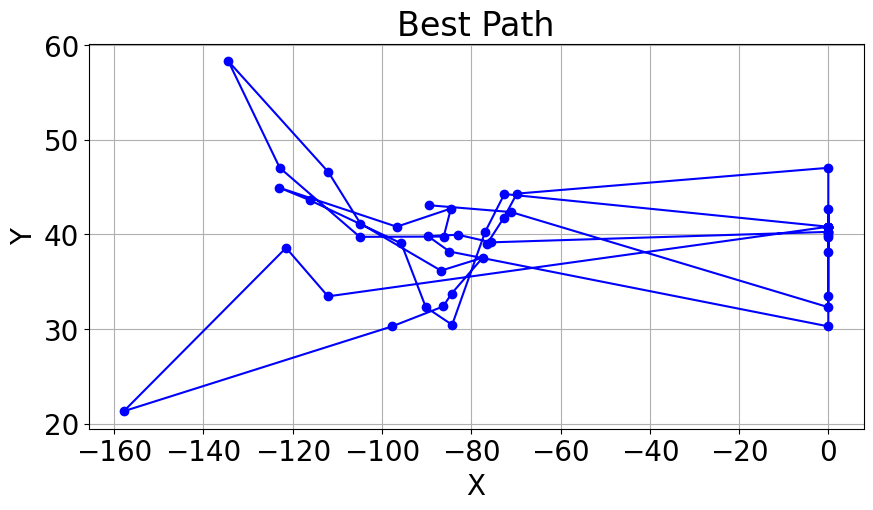

In [4]:
plt.figure()
plt.plot(path_x,path_y, 'bo-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Path')
plt.grid(True)
plt.show()

In [5]:
generations = L_values[:, 0]
avg_path_lengths = L_values[:, 1]

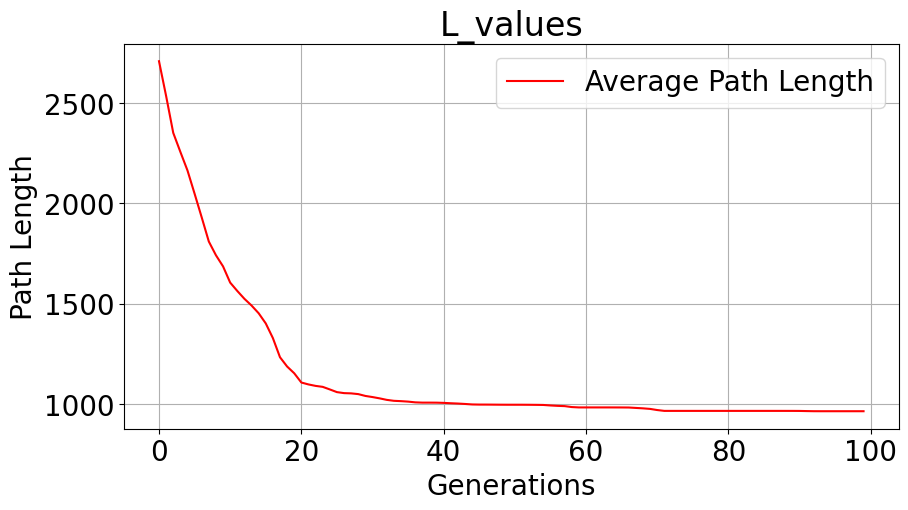

In [6]:
plt.figure()
plt.plot(generations, avg_path_lengths, 'r-', label='Average Path Length')
plt.xlabel('Generations')
plt.ylabel('Path Length')
plt.title('L_values')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 10.1
Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 10, is characterized by a different temperature or a limited set of temperatures (if you need more than 10 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

I did apply the parallel code with 80 state-capitals randomly obteined inside a square
Apply your parallel code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file.
do you improve with respect using the same number of computing cores but with **independent GA searches** ?
If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?